In [1]:
%matplotlib inline
#Import basic packages
import numpy as np 
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import cross_validation
from IPython.display import display
from sklearn.metrics import classification_report,confusion_matrix

/Users/sdhankhad/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
mydataset = pd.read_csv('creditcard.csv')

In [3]:
mydataset.shape

(284807, 31)

In [4]:
mydataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
mydataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
mydataset.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

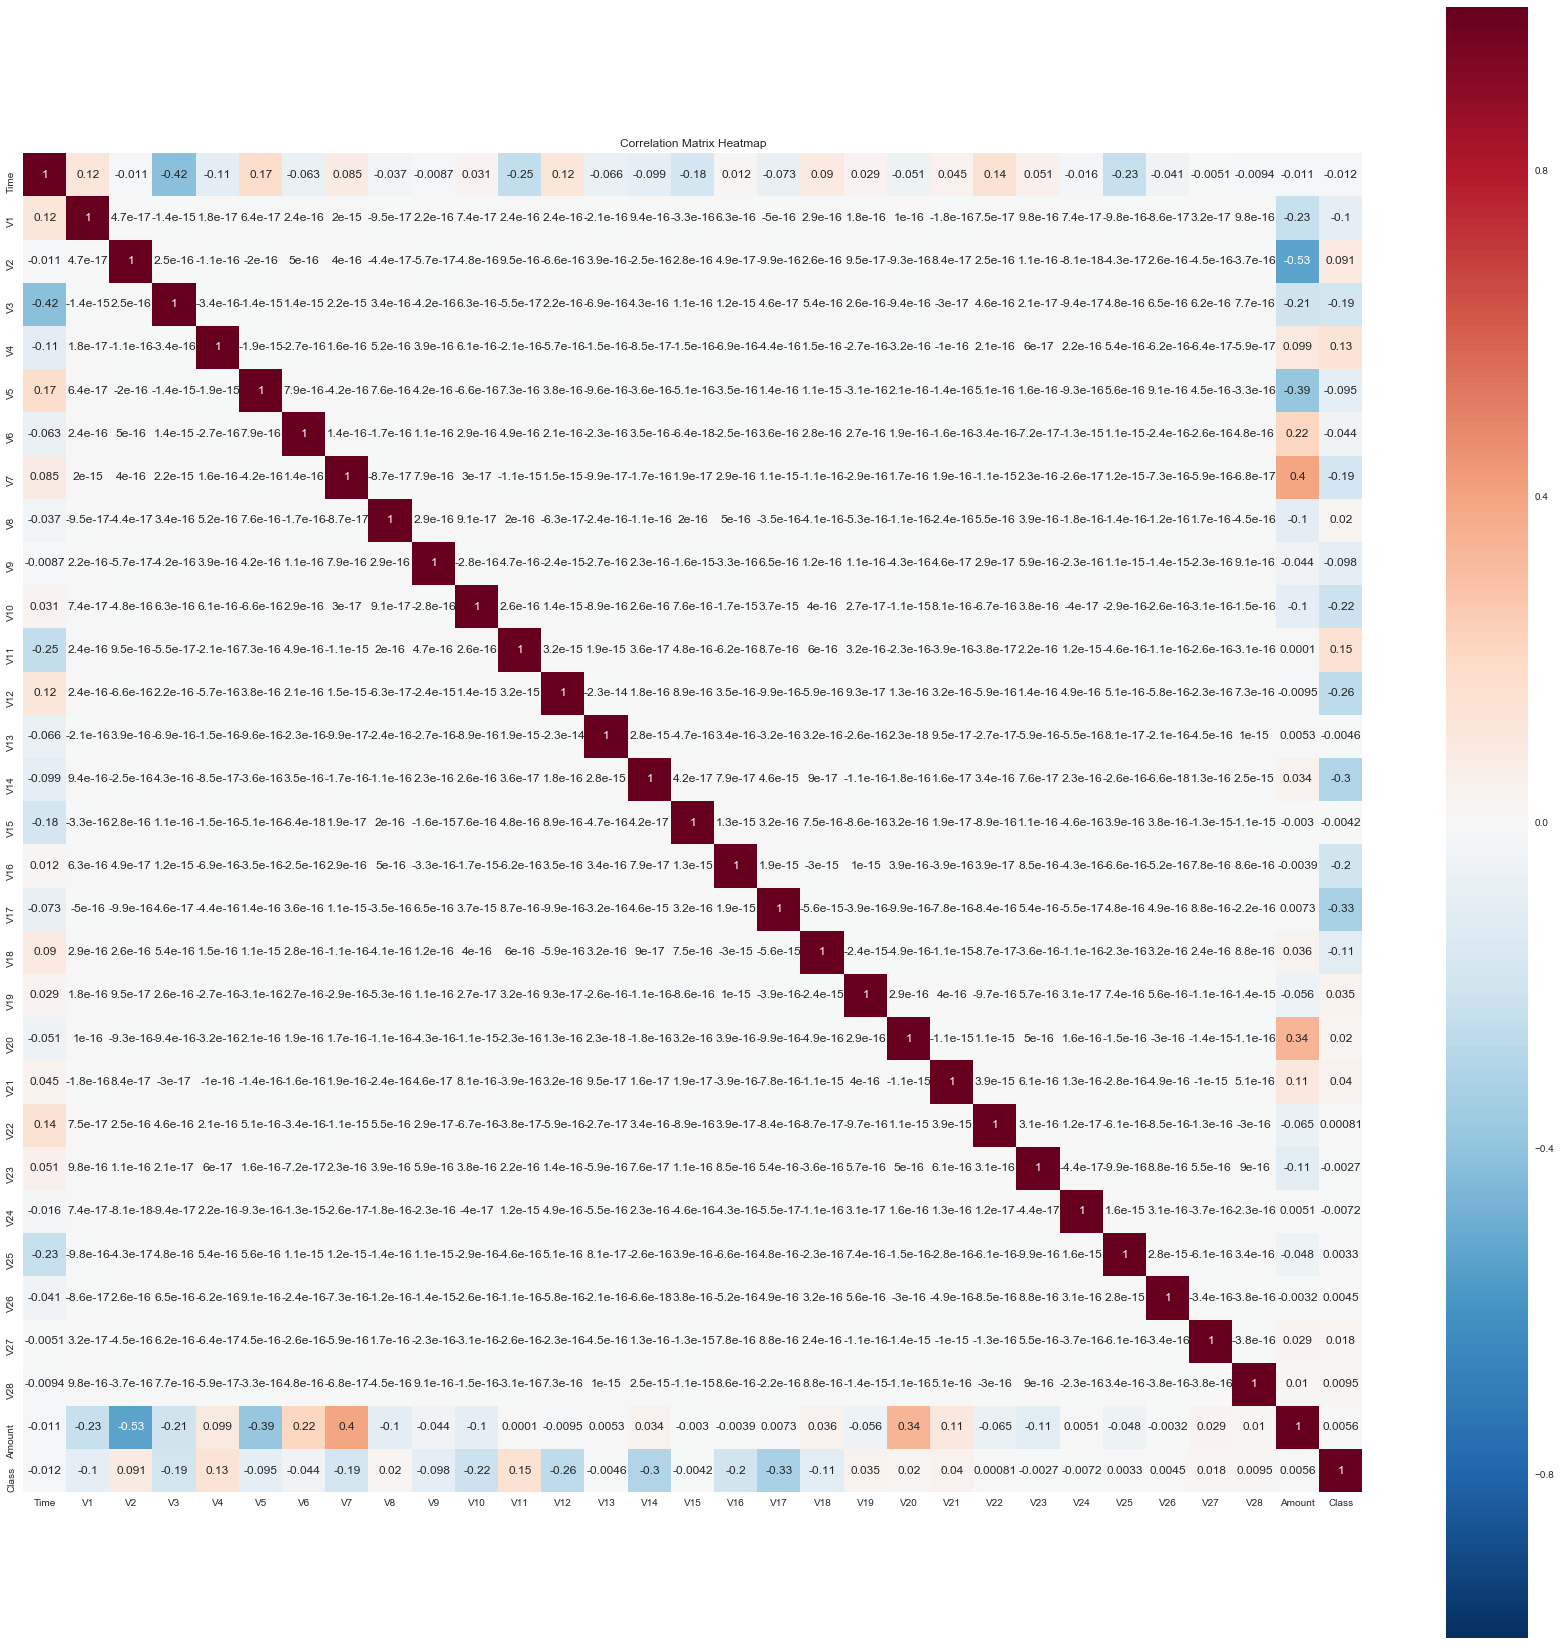

In [7]:
fig = plt.figure(figsize=(30,30))
corr = mydataset.corr()
sns.heatmap(corr, vmax=1, square=True,annot=True)
sns.plt.title('Correlation Matrix Heatmap')

In [8]:
mydataset.groupby(("Class")).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [9]:
mydataset.mean()

Time      9.481386e+04
V1        3.919560e-15
V2        5.688174e-16
V3       -8.769071e-15
V4        2.782312e-15
V5       -1.552563e-15
V6        2.010663e-15
V7       -1.694249e-15
V8       -1.927028e-16
V9       -3.137024e-15
V10       1.768627e-15
V11       9.170318e-16
V12      -1.810658e-15
V13       1.693438e-15
V14       1.479045e-15
V15       3.482336e-15
V16       1.392007e-15
V17      -7.528491e-16
V18       4.328772e-16
V19       9.049732e-16
V20       5.085503e-16
V21       1.537294e-16
V22       7.959909e-16
V23       5.367590e-16
V24       4.458112e-15
V25       1.453003e-15
V26       1.699104e-15
V27      -3.660161e-16
V28      -1.206049e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64

In [10]:
fraud = mydataset[mydataset.Class == 1]
nonfraud= mydataset[mydataset.Class ==0 ]
print('Genuine Transaction ='+str(len(nonfraud)))
print('Fraud Transaction ='+str(len(fraud)))

Genuine Transaction =284315
Fraud Transaction =492


In [11]:
print('#######-----Fraud----###')
print (mydataset.Time[mydataset.Class == 1].describe())
print('---------')
print ("######------Non-Fraud-----###")
print (mydataset.Time[mydataset.Class == 0].describe())

#######-----Fraud----###
count       492.000000
mean      80746.806911
std       47835.365138
min         406.000000
25%       41241.500000
50%       75568.500000
75%      128483.000000
max      170348.000000
Name: Time, dtype: float64
---------
######------Non-Fraud-----###
count    284315.000000
mean      94838.202258
std       47484.015786
min           0.000000
25%       54230.000000
50%       84711.000000
75%      139333.000000
max      172792.000000
Name: Time, dtype: float64


#### Data Visulaization

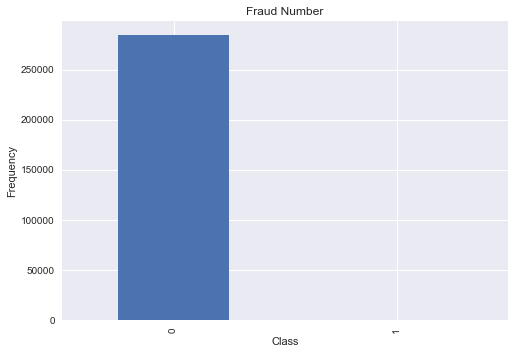

In [12]:
value = pd.value_counts(mydataset['Class'],sort=True).sort_index()
value.plot(kind = 'bar')
plt.title('Fraud Number')
plt.xlabel('Class')
plt.ylabel('Frequency')

In [13]:
mydataset.groupby(["Amount","Class"]).mean()

Time         V1         V2         V3         V4  \
Amount   Class                                                              
0.00     0       89208.927697   0.101386   0.269074   0.606083   1.805266   
         1      100142.777778  -3.094881   3.223141  -5.846313   5.413728   
0.01     0       81959.054698  -0.568196   0.410580   0.583500   0.026995   
         1      108844.600000  -8.106526   7.137760 -10.283143   5.867211   
0.02     0       87315.576471   0.170367  -0.274388   0.966057  -1.299248   
0.03     0       99923.333333  -0.327433  -0.505556   0.237874  -1.734726   
0.04     0       91373.000000  -0.336613  -0.782633   0.676427   0.351779   
0.05     0       97792.795455   0.720976  -0.324505   0.575280  -0.503867   
0.06     0      100055.666667   0.280351  -0.631198   0.872354   2.105272   
0.07     0       95949.363636  -0.661041   0.596986   0.755066  -0.126917   
0.08     0      123463.200000  -0.270564   1.085062  -1.188690  -0.539230   
0.09     0       79243.500000   0.294197   0.579213   0.860091  -0.260245   
0.10     0       99449.647059   0.168949  -0.190344   0.342334  -0.472706   
0.11     0       78123.086957  -0.363593  -0.423184   0.140828  -0.156359   
0.12     0      106252.559829   0.524513   0.441061   0.417550   0.302593   
0.13     0       94869.400000   0.104466   0.566725   0.511901  -0.426618   
0.14     0       74189.400000   0.269757   0.960737   0.378975   1.260389   
0.15     0      105084.315789  -0.169206   0.984781  -0.328859  -0.466467   
0.16     0      110600.500000  -0.326951   1.374010  -0.279482   0.211618   
0.17     0       72825.428571   0.619894   0.723221   0.002693   1.166964   
0.18     0      163944.000000  -5.255114   4.953862  -5.306732  -0.338475   
0.19     0       99229.750000  -0.102992   0.595286   0.104316  -0.407601   
0.20     0       86217.500000   0.700695  -0.328210   0.381169   0.742509   
         1       79540.000000  -0.114361   1.036129   1.984405   3.128243   
0.22     0       95733.083333  -0.681443   1.007558  -0.038134  -0.899296   
0.23     0      104118.921569  -1.048461   1.173918  -0.431637  -1.115235   
0.24     0       85748.200000   0.027563   0.918449  -0.177947   0.120174   
0.25     0       50691.200000   0.303935   0.726180   0.864666   1.212943   
0.26     0       65706.000000   1.530950  -0.037037  -0.572374  -0.128446   
0.27     0       74275.571429   0.578088   0.775807  -0.049909   1.024051   
...                       ...        ...        ...        ...        ...   
6454.74  0      132779.000000  -4.389647  -1.993089 -12.627453   0.282311   
6511.00  0       43684.000000 -12.618406 -16.550248  -7.779531   2.245844   
6652.89  0      128701.000000 -19.780626 -25.663628 -10.865410   6.046025   
6669.00  0       41978.000000 -11.839743 -17.711661  -6.893572   4.385610   
6828.00  0      141031.000000 -11.128890 -22.632193  -9.398485   5.163725   
6900.47  0      149657.000000 -11.448790 -21.749060  -8.478933   9.477565   
6950.51  0       38763.000000 -14.711825 -23.250844  -7.631400   5.975826   
6982.67  0      140335.000000 -11.446245 -17.964561 -10.768507   4.912280   
6998.00  0      145548.000000 -11.316807 -22.225978 -10.723514   5.827606   
7367.00  0      145630.000000 -32.543140 -50.383269 -10.733302   9.571705   
7429.15  0       32605.000000 -23.383129 -18.098804 -20.195367   4.249104   
7541.70  0      141546.000000 -13.396920 -19.230653  -9.042012   5.678408   
7583.32  0      133971.000000 -10.950173 -13.359133 -10.664755   1.157565   
7636.30  0       47807.000000 -13.537461 -24.426864  -7.355943   6.896486   
7712.43  0        1264.000000 -11.140706  -9.612726 -12.389545   6.013346   
7766.60  0      128027.000000 -12.895214 -20.492129 -12.794629   4.691974   
7862.39  0      150726.000000 -13.099603 -25.434451 -11.921912   4.976147   
7879.42  0       30537.000000 -14.191832 -25.313252  -7.578781   7.730844   
8182.70  0      145381.000000 -13.710746 -21.177912  -9.340628   8.385815   
8360.00  0      14475

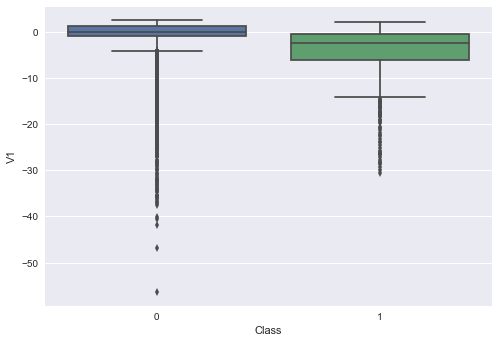

In [3]:
sns.boxplot(x="Class", y="V1", data=mydataset)

In [5]:
dataclass= mydataset['Class']
#preserving only necessary columns 
mydataset.drop(['Class'], axis = 1, inplace = True)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mydataset,dataclass,test_size=0.25, random_state=42)
print("Training and testing split was successful.")
print('Training set volume:', X_train.shape[0])
print('Test set volume:', X_test.shape[0])

Training and testing split was successful.
('Training set volume:', 213605)
('Test set volume:', 71202)


###### It's good idea to calculate score for training and test, reasons are: 1-It's often a good sign that your training and test scores are relatively close 2-It's very useful for deciding how to improve your model. 3- looking at the training score can help you prevent overfitting. 4- The higher the score is, the better the model is performing. I took

In [7]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
83225,59741.0,-1.648591,1.228130,1.370169,-1.735542,-0.029455,-0.484129,0.918645,-0.438750,0.982144,...,0.384201,-0.218076,-0.203458,-0.213015,0.011372,-0.304481,0.632063,-0.262968,-0.099863,38.42
52800,45648.0,-0.234775,-0.493269,1.236728,-2.338793,-1.176733,0.885733,-1.960981,-2.363412,-2.694774,...,0.364679,-1.495358,-0.083066,0.074612,-0.347329,0.541900,-0.433294,0.089293,0.212029,61.20
21293,31579.0,1.134626,-0.774460,-0.163390,-0.533358,-0.604555,-0.244482,-0.212682,0.040782,-1.136627,...,-0.396476,-0.684454,-1.855269,0.171997,-0.387783,-0.062985,0.245118,-0.061178,0.012180,110.95
133600,80455.0,0.069514,1.017753,1.033117,1.384376,0.223233,-0.310845,0.597287,-0.127658,-0.701533,...,0.148760,0.097023,0.369957,-0.219266,-0.124941,-0.049749,-0.112946,0.114440,0.066101,10.00
38225,39302.0,-0.199441,0.610092,-0.114437,0.256565,2.290752,4.008475,-0.123530,1.038374,-0.075846,...,0.292972,-0.019733,0.165463,-0.080978,1.020656,-0.300730,-0.269595,0.481769,0.254114,22.00


In [14]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89


In [8]:
#Logistic Regression
lr=LogisticRegression()
lr.fit(X_train,y_train)
testscoreLR=accuracy_score(y_test,lr.predict(X_test))
print('logistic regression accuracy score:'+str(testscoreLR))
print(confusion_matrix(y_test,lr.predict(X_test)))
print(classification_report(y_test,lr.predict(X_test)))

logistic regression accuracy score:0.998960703351
[[71066    23]
 [   51    62]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71089
          1       0.73      0.55      0.63       113

avg / total       1.00      1.00      1.00     71202



In [17]:
#Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
testscoreDT=accuracy_score(y_test,dt.predict(X_test))
print("decision tree accuracy Rate is:"+str(testscoreDT))
print(confusion_matrix(y_test,dt.predict(X_test)))
print(classification_report(y_test,dt.predict(X_test)))

decision tree accuracy Rate is:0.999297772534
[[71073    16]
 [   34    79]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71089
          1       0.83      0.70      0.76       113

avg / total       1.00      1.00      1.00     71202



In [9]:
#Decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=8)
dt.fit(X_train, y_train)
testscoreDT=accuracy_score(y_test,dt.predict(X_test))
print("decision tree accuracy Rate is:"+str(testscoreDT))
print(confusion_matrix(y_test,dt.predict(X_test)))
print(classification_report(y_test,dt.predict(X_test)))

decision tree accuracy Rate is:0.999494396225
[[71077    12]
 [   24    89]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     71089
          1       0.88      0.79      0.83       113

avg / total       1.00      1.00      1.00     71202



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
testscoreRF=accuracy_score(y_test,dt.predict(X_test)).mean()
print("Random Tree accuracy Rate is:"+str(testscoreRF))

In [ ]:
print(confusion_matrix(y_test,rf.predict(X_test)))
print(classification_report(y_test,rf.predict(X_test)))

In [ ]:
#Gaussian navie bayers
nb=GaussianNB()
nb.fit(X_train,y_train)
testscoreNB=accuracy_score(y_test,nb.predict(X_test))
print('GaussianNB accuracy score:'+str(testscoreNB))
print(confusion_matrix(y_test,nb.predict(X_test)))
print(classification_report(y_test,nb.predict(X_test)))